## Discretizing functions with finite elements

As we saw in class and in the previous python notebook, we can discretize a function inside of an element by using shape functions directly in terms of the variable $x$ 

$u^e(x) = \sum N_i^e(x)u_i^e$

And in that case the derivative of the function is given by 

$\frac{du^e(x)}{dx} = \sum \frac{dN_i^e(x)}{dx} u_i^e$

And this is true whether we have linear shape functions, quadratic shape functions, etc... 

However, this requires using shape functions that change for every element. Additionally, while this is doable in 1D, just going to 2D makes it really hard to define the shape functions directly in terms of $x,y$ for even simple polygons like quadrilaterals. 

Instead, we want to map, for each element, the domain $x$, to another domain $\xi$ that is always the same and for which the shape functions don't change. This is usually called the parent domain.

The isoparametric map consits of using the shape functions to do two things: mapping the geometry, as well as interpolating the function. See the figure (same as in the lecture) 


<img src="images/isoparametric_concept_1D.png" alt="isoparametric concept in 1D" style="width: 600px;"/>

For the geometry, i.e. the map between the physical space $x$ and the parametric space $\xi$ we have 

$$x = \sum N_i^e(\xi)x_i^e$$

where the shape functions are functions of $\xi$ and the $x_i^e$ are the nodal coordinates. In this notebook we will use shape functions based on Lagrange polynomials, same thing we did for the previous notebook, but now in the $\xi$ space, which is $\xi\in[-1,1]$. 

With these same shape functions we can interpolate the function $u$ given nodal values $u_i$

$$u = \sum N_i^e(\xi)u_i^e$$

We don't have the function $u$ directly in terms of $x$, rather, we have it directly in terms of $\xi$. But this is no problem! We also have $x$ in terms of $\xi$ so we can simply select a bunch of values of $\xi$, and evaluate both $x$ and $u$ and we can plot $u$ as a function of $x$ even though we dont have the explicit expression. 

How about the derivative? 

As discussed in the video, we first need the Jacobian of the isoparametric map 

$j = \frac{\mathrm{d} x}{\mathrm{d} \xi} = \sum \frac{\mathrm{d} N_i(\xi)}{\mathrm{d} \xi} x_i^e $ 

Be careful not to confuse this with the determinant of the deformation gradient. The inverse of this Jacobian is the opposite derivative 

$j^{-1} = \frac{\mathrm{d} \xi}{\mathrm{d} x}$ 

Thus, if we want to take derivatives of $u$ with respect to $x$ all we need is to take derivatives with respect to the coordinate $\xi$ and use of the inverse Jacobian to complete the change rule. 

$\frac{\mathrm{d} u^h}{\mathrm{d} x} = j^{-1} \sum \frac{\mathrm{d} N_i(\xi)}{\mathrm{d} \xi} u_i^e  $

Note that in 1D the Jacobian is just a number, but in 2D it is a $2\times2$ matrix and in 3D it is a $3\times3$ matrix. There might be some issue with notation depending on textbook, and depending on that choice there will be a transpose or not for the inverse Jacobian. We will follow the Wriggers approach, which ends up with a *transpose* in the end, but again, this is relevant for 2D and 3D. 


In [2]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
n_ele = 4
n_nod = 5
elements = np.array([[0,2],[2,3],[3,4],[4,1]])
node_X = np.array([0.,1.,0.25,0.5,0.75])
node_u = np.random.rand(5)

For linear elements we have the following shape functions in the parametric domain $\xi\in[-1,1]$ 

$N_1(\xi) \frac{1}{2}(1-\xi)$

$N_2(\xi) \frac{1}{2}(1+\xi)$

The isoparametric map for linear elements is thus  

$x = N_1(\xi)x_1^e + N_2(\xi)x_2^e $

where $x_1^e$ and $x_2^e$ are the coordinates of the nodes making up the element in the $x$ space. 

And interpolation of the function $u$ is done with  

$u(\xi) = N_1(\xi)u_1^e + N_2(\xi)u_2^e $

where $u_1^e$ and $u_2^e$ are the values of the function at the two nodes for an element.

To contrast that the two approaches (the one without the isoparametric map and the one with the isoparametric map) lead to the same plots, I'm going to do both ways

In [4]:
## Define shape function in terms of x
def N1(x,x1e,x2e):
    le = x2e-x1e
    return (1./le)*(x2e-x)

def N2(x,x1e,x2e):
    le = x2e-x1e
    return (1./le)*(x-x1e)

## Define gradients of shape functions 
def dN1dx(x,x1e,x2e):
    le = x2e-x1e
    return -1./le

def dN2dx(x,x1e,x2e):
    le = x2e-x1e
    return 1./le


Text(0, 0.5, 'du(x)/dx')

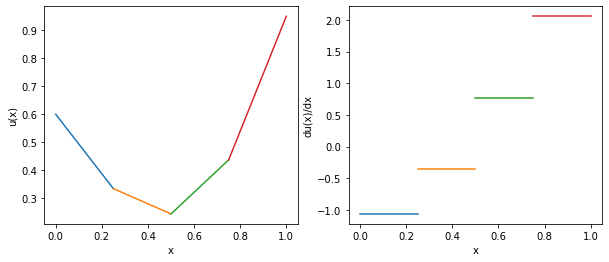

In [5]:
## plot a function over the domain by plotting in each element using shape functions in terms of x

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))

# Loop over elements 
for i in range(n_ele):
    
    # Read the nodes that make up this element 'i'
    n1 = elements[i,0] #note I don't need the '-1' because I numbered nodes from '0'
    n2 = elements[i,1]
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[n1]
    x2e = node_X[n2]
    
    # Get the nodal values of the function 'u'
    u1e = node_u[n1]
    u2e = node_u[n2]
    
    # Eval the shape function evaluation for multiple x in this element
    x_vec = np.linspace(x1e,x2e,50)
    
    # use the shape functions to interpolate from the nodal u values to all the 'x'
    u_vec = N1(x_vec,x1e,x2e)*u1e + N2(x_vec,x1e,x2e)*u2e
    
    # gradient is going to be constant in this case
    dudx = dN1dx(x_vec,x1e,x2e)*u1e + dN2dx(x_vec,x1e,x2e)*u2e
    dudx_vec = dudx*np.ones(50)
    
    # plot function u
    ax1.plot(x_vec,u_vec)
    
    # plot the gradient
    ax2.plot(x_vec,dudx_vec)
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax2.set_ylabel('du(x)/dx')

In [6]:
## Define shape function in terms of the parameter domain xi 
def N1(xi):
    return (0.5)*(1-xi)

def N2(xi):
    return (0.5)*(1+xi)

## Define gradients of shape functions 
def dN1dxi(xi):
    return -0.5*np.ones(xi.shape)

def dN2dxi(xi):
    return 0.5*np.ones(xi.shape)

Text(0, 0.5, 'du(x)/dx')

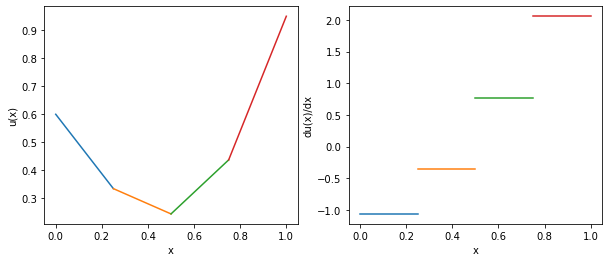

In [7]:
## plot a function over the domain by plotting in each element and using the isoparametric concept  

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))

# Loop over elements 
for i in range(n_ele):
    
    # Read the nodes that make up this element 'i'
    n1 = elements[i,0] #note I don't need the '-1' because I numbered nodes from '0'
    n2 = elements[i,1]
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[n1]
    x2e = node_X[n2]
    
    # Get the nodal values of the function 'u'
    u1e = node_u[n1]
    u2e = node_u[n2]
    
    # Eval the shape function evaluation for multiple xi in this element
    xi_vec = np.linspace(-1,1,50)
    
    # use the shape functions to interpolate from the nodal u values to all the 'xi'
    u_vec = N1(xi_vec)*u1e + N2(xi_vec)*u2e
    
    ## ISOPARAMETRIC MAP
    x_vec = N1(xi_vec)*x1e + N2(xi_vec)*x2e
    
    ## JACOABIAN OF THE ISOPARAMETRIC MAP
    dxdxi = dN1dxi(xi_vec)*x1e + dN2dxi(xi_vec)*x2e
    # note, it is a vector of constants, the inverse in this case is just 1/Jac 
    # otherwise you would have to take the inverse of the jacobian matrix 
    dxidx = 1./dxdxi
    
    # gradient is going to be constant in this case
    # note, we can take derivatives with respect to xi now 
    dudxi = dN1dxi(xi_vec)*u1e + dN2dxi(xi_vec)*u2e
    # need to use the chain rule and thus the inverse jacobian to get gradients with respect to x
    dudx_vec = dudxi*dxidx
    
    # plot function u
    ax1.plot(x_vec,u_vec)
    
    # plot the gradient
    ax2.plot(x_vec,dudx_vec)
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax2.set_ylabel('du(x)/dx')

Exactly the same thing!! 

### Python activity: quadratic shape functions 

Use the isoparametric concept for a similar mesh as used in the previous notebook:


<img src="images/mesh_1D_quadratic.png" alt="mesh example in 1D with 2-node linear elements" style="width: 600px;"/>



In [8]:
n_ele = 3
n_nod = 7
elements = np.array([[0,1,2],[2,3,4],[4,5,6]])
node_X = np.linspace(0,2,7)
node_u = np.random.rand(7)

## Gauss quadrature 

Assume we want to integrate the following function 

$$x^2+1$$

over the domain $x\in[2,4]$

We will follow the approach in the video and integrate instead over the domain $\xi$ by doing the change of variables 

$$\int_x f(x)dx = \int_\xi f(x) |j|d\xi$$ 

where the $|j|$ is the determinant of the Jacobian of the isoparametric map. In 1D this is just the absolute value. The integral over $\xi$ is in the range $[-1,1]$ for which one can find tables with Gauss points to approximate

$$\int_{-1}^{1} f(x)|j|d\xi \approx \sum_i w_i f(x(\xi_i))|j(\xi_i)|$$

where the $w_i$ are the weights of the integration points and $\xi_i$ are the integration points. Note that $x$ and the Jacobian of the isoparametric map need to be evaluated at the corresponding $\xi_i$



In [11]:
## Assume we have a function of x that we want to integrate
def func(x):
    return  (x**2+1)

In [12]:
## Gauss points and weights 
gauss_1 = np.array([[0.,2.]])
gauss_2 = np.array([[-1./np.sqrt(3.),1.],[1./np.sqrt(3.),1]])
gauss_3 = np.array([[-np.sqrt(3./5.),5./9.],[0,8./9.],[np.sqrt(3./5.),5./9.]])

In [13]:
## Linear shape functions for the parent element 
def N1e(xi):
    xi1e = -1.0
    xi2e = +1.0
    return (xi-xi2e)/(xi1e-xi2e)

def N2e(xi):
    xi1e = -1.0
    xi2e = +1.0
    return (xi-xi1e)/(xi2e-xi1e)

def dN1edxi(xi):
    xi1e = -1.0
    xi2e = +1.0
    return (1.0)/(xi1e-xi2e)

def dN2edxi(xi):
    xi1e = -1.0
    xi2e = +1.0
    return (1.0)/(xi2e-xi1e)

In [16]:
## integrate function of func(x) in the element [2,4] numerically and compare to the analytical integral

## The element is defined by
x1e = 2.
x2e = 4.

## Numerical integral with 1,2,3 gauss point 
numint1 = 0
numint2 = 0
numint3 = 0
print('Integration with 1 Gauss point')
for i in range(len(gauss_1)):
    # Go from xi_ip to x_ip
    xi_ip = gauss_1[i,0] # just reading from the vector of Gauss points
    x_ip = N1e(xi_ip)*x1e + N2e(xi_ip)*x2e 
    print('ip ',i,' xi ',xi_ip, ' x ',x_ip)
    # Jacobian for the linear map
    J = dN1edxi(xi_ip)*x1e + dN2edxi(xi_ip)*x2e
    print('J ',J)
    # Read the weight
    w_ip = gauss_1[i,1]
    # Add to the integral
    numint1+= w_ip*(func(x_ip)*J)
print('1-point Gauss')
print(numint1)
print('\nIntegration with 2 Gauss points')
for i in range(len(gauss_2)):
    # Go from xi_ip to x_ip
    xi_ip = gauss_2[i,0] # just reading from the vector of Gauss points
    x_ip = N1e(xi_ip)*x1e + N2e(xi_ip)*x2e 
    print('ip ',i,' xi ',xi_ip, ' x ',x_ip)
    # Jacobian for the linear map
    J = dN1edxi(xi_ip)*x1e + dN2edxi(xi_ip)*x2e
    print('J ',J)
    # Read the weight
    w_ip = gauss_2[i,1]
    # Add to the integral
    numint2+= w_ip*(func(x_ip)*J)
print('2-point Gauss')
print(numint2)
print('\nIntegration with 3 Gauss points')
for i in range(len(gauss_3)):
    # Go from xi_ip to x_ip
    xi_ip = gauss_3[i,0] # just reading from the vector of Gauss points
    x_ip = N1e(xi_ip)*x1e + N2e(xi_ip)*x2e 
    print('ip ',i,' xi ',xi_ip, ' x ',x_ip)
    # Jacobian for the linear map
    J = dN1edxi(xi_ip)*x1e + dN2edxi(xi_ip)*x2e
    print('J ',J)
    # Read the weight
    w_ip = gauss_3[i,1]
    # Add to the integral
    numint3+= w_ip*(func(x_ip)*J)
print('3-point Gauss')
print(numint3)

Integration with 1 Gauss point
ip  0  xi  0.0  x  3.0
J  1.0
1-point Gauss
20.0

Integration with 2 Gauss points
ip  0  xi  -0.5773502691896258  x  2.422649730810374
J  1.0
ip  1  xi  0.5773502691896258  x  3.5773502691896257
J  1.0
2-point Gauss
20.666666666666664

Integration with 3 Gauss points
ip  0  xi  -0.7745966692414834  x  2.2254033307585166
J  1.0
ip  1  xi  0.0  x  3.0
J  1.0
ip  2  xi  0.7745966692414834  x  3.7745966692414834
J  1.0
3-point Gauss
20.666666666666668


In [19]:
## get the analytical integral to compare with our calculation
x = sp.Symbol('x')
x1e = 2
x3e = 4
integral_exact = sp.integrate( x**2+1,(x,x1e,x3e))
print('Exact integral = %f'%integral_exact)

Exact integral = 20.666667


The 2-point rule is already enough. We did the 3-point one but didn't get any more accuracy. This is because the Gauss points are actually specifically design to exactly interpolate polynomials. With $n_G$ Gauss points, we can integrate exactly polynomials of degree $2n_G-1$

### Activity: Gauss quadrature 

Integrate the function 

$$f(x)= -(x-1)(x-3)$$

using a linear element, in the interval $x\in[0,4]$



In [20]:
## Assume we have a function of x that we want to integrate
def func(x):
    return  -(x-1)*(x-3)

In [22]:
x1e = 0
x2e = 4
sp.integrate( -(x-1.)*(x-3.),(x,x1e,x2e))

-1.33333333333333

### Activity: integrate over a quadratic element 

Repeat the above integral but this time with a quadratic element